### **Projects in Advanced Machine Learning**
#### **GR5074**
#### **Homework 3**
#### **Cecilia Cabello Esquer**

**Instructions:**

**(Use the BBC News Category Classification Notebook in the Week 12 folder to import data for this assignment)**

**Your final report should be written up in a Jupyter notebook. It should be posted to a public Github repo as an ipynb AND it should be saved as an html file and submitted to this assignment via courseworks. Please include the link to your Github repo in this html file.**

**Your report should include the following information:**

**(Note: Be sure to split your data into training and test sets after importing the csv file with pandas. You can use sklearn's train_test_split() function to split your data. )**

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
import keras

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [0]:
# From
## Metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, mean_squared_error, r2_score, mean_absolute_error

## Split train_test
from sklearn.model_selection import train_test_split

## Preprocessing
from sklearn.preprocessing import OneHotEncoder
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

## Models
### All
from keras.layers import Dense, Embedding, Flatten
from keras.models import Sequential

### Conv1D Layers
from keras.layers import Conv1D, MaxPooling1D

### GRU/LSTM
from keras.layers import SimpleRNN, LSTM, GRU

### Bidirectional
from keras.layers import Bidirectional

In [3]:
# Abrir datos
data= pd.read_csv("https://storage.googleapis.com/dataset-uploader/bbc/bbc-text.csv")
data.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


## **1) Visualize the categories of your target variable and describe the dataset generally (the data includes news articles from the BBC news.) A simple description is fine.**


### Exploratory analysis

Understanding the database and variables 

In [4]:
# Description of categorical variables
print(data.describe().transpose())
print( )
print(data['category'].value_counts())

         count unique                                                top freq
category  2225      5                                              sport  511
text      2225   2126  apple ipod family expands market apple has exp...    2

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: category, dtype: int64


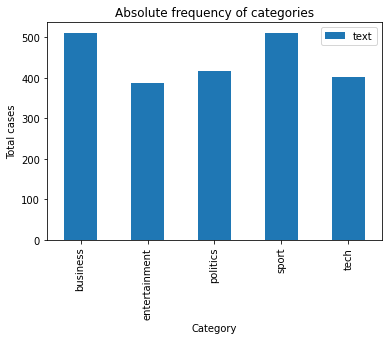

In [5]:
data.groupby('category').count().plot.bar()
plt.title("Absolute frequency of categories")
plt.xlabel('Category')
plt.ylabel('Total cases')
plt.show()

In [6]:
data['words']= data['text'].apply(lambda x: len(x.split()))
data['characters']= data['text'].apply(lambda x: len(x))
print(data.describe())

             words   characters
count  2225.000000   2225.00000
mean    390.295281   2262.93618
std     241.753128   1364.10253
min      90.000000    501.00000
25%     250.000000   1446.00000
50%     337.000000   1965.00000
75%     479.000000   2802.00000
max    4492.000000  25483.00000


Text(0.5, 1.0, 'Histogram of number of characters per text')

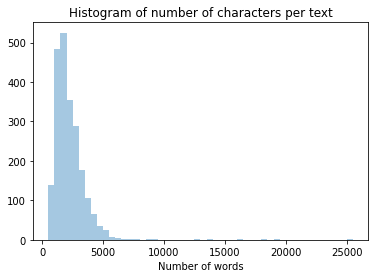

In [7]:
sn= sns.distplot(data['characters'], hist=True, kde=False, 
            axlabel= "Number of words")
sn.set_title("Histogram of number of characters per text" )

Text(0.5, 1.0, 'Histogram of number of words per text')

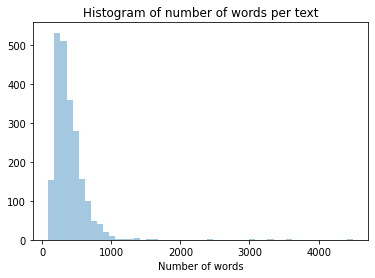

In [8]:
sn= sns.distplot(data['words'], hist=True, kde=False, 
            axlabel= "Number of words")
sn.set_title("Histogram of number of words per text" )

## **2) Preprocess your data such that each document in the data is represented as a sequence of equal length.**

In [9]:
df= data[['category', 'text']]
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [0]:
X=df['text']
y=df['category']

Preprocessing class

In [11]:
# Tokenize the data intto one hot vectors

maxlen = 100
training_samples = 200  
validation_samples = 10000 
max_words = 10000

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X) 
sequences = tokenizer.texts_to_sequences(X)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen) 

labels = np.asarray(pd.get_dummies(y))
print(data.shape)
print(len(y))

Found 29726 unique tokens.
(2225, 100)
2225


### Split data

In [12]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, random_state=42)

print(X_train.shape)
print(y_train.shape)

(1668, 100)
(1668, 5)


**3) Use the data to fit separate models to each of the following architectures:**

**A. A model with an embedding layer and dense layers (but w/ no layers meant for sequential data)**

In [13]:
model = Sequential()
model.add(Embedding(max_words, 200, input_length=maxlen))
model.add(Flatten())

model.add(Dense(200, activation="sigmoid"))

model.add(Dense(5, activation="softmax"))
model.compile(optimizer= "adam", loss="categorical_crossentropy", metrics=["acc"])
model.summary()

model.fit(X_train, y_train, 
                    epochs=20,
                    batch_size=200,
                    validation_split= 0.2)

score, acc =model.evaluate(X_test, y_test)

print('Test score:', score)
print('Test accuracy:', acc)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 200)          2000000   
_________________________________________________________________
flatten_1 (Flatten)          (None, 20000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               4000200   
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 1005      
Total params: 6,001,205
Trainable params: 6,001,205
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 1334 samples, validate on 334 samples
Epoch 1/20
1334/1334 [==============================] - 0s 364us/step - loss: 1.6461 - acc: 0.2511 - val_loss: 1.5632 - val_acc: 0.3383
Epoch 2/20
1334/1334 [==============================] - 0s 106us/step - loss: 1.3209 - acc: 0.5420 - val_loss: 1.4575 - val_acc: 0.4281
Epoch 3/20
1334/1334 [==============================] - 0s 99us/step - loss: 0.9592 - acc: 0.9483 - val_loss: 1.2672 - val_acc: 0.6347
Epoch 4/20
1334/1334 [==============================] - 0s 95us/step - loss: 0.5763 - acc: 0.9933 - val_loss: 1.0612 - val_acc: 0.7126
Epoch 5/20
1334/1334 [==============================] - 0s 92us/step - loss: 0.2806 - acc: 0.9993 - val_loss: 0.8975 - val_acc: 0.7425
Epoch 6/20
1334/1334 [==============================] - 0s 94us/step - loss: 0.1283 - acc: 1.0000 - val_loss: 0.7731 - val_acc: 0.7904
Epoch 7/20
1334/1334 [==============================] - 0s 87us/step - loss: 0.0620 - acc: 1.0000 - val_loss: 0.6940 - val_acc: 0.7994
Epoch 

**B. A model using an Embedding layer with Conv1d Layers**

In [15]:
model = Sequential()
model.add(Embedding(max_words, 200, input_length=maxlen))
model.add(Conv1D(200, 7, activation='relu'))
model.add(MaxPooling1D(5))

model.add(Flatten())

model.add(Dense(200, activation="sigmoid"))
model.add(Dense(5, activation="softmax"))
model.compile(optimizer= "adam", loss="categorical_crossentropy", metrics=["acc"])
model.summary()

model.fit(X_train, y_train, 
                    epochs=20,
                    batch_size=200,
                    validation_split= 0.2)

score, acc =model.evaluate(X_test, y_test)

print('Test score:', score)
print('Test accuracy:', acc)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 200)          2000000   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 94, 200)           280200    
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 18, 200)           0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3600)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 200)               720200    
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 1005      
Total params: 3,001,405
Trainable params: 3,001,405
Non-trainable params: 0
____________________________________________

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 1334 samples, validate on 334 samples
Epoch 1/20
1334/1334 [==============================] - 1s 960us/step - loss: 1.6294 - acc: 0.2099 - val_loss: 1.5878 - val_acc: 0.2455
Epoch 2/20
1334/1334 [==============================] - 0s 178us/step - loss: 1.5422 - acc: 0.3921 - val_loss: 1.5492 - val_acc: 0.4192
Epoch 3/20
1334/1334 [==============================] - 0s 175us/step - loss: 1.4013 - acc: 0.6672 - val_loss: 1.3902 - val_acc: 0.5749
Epoch 4/20
1334/1334 [==============================] - 0s 173us/step - loss: 1.0410 - acc: 0.8141 - val_loss: 1.0034 - val_acc: 0.7006
Epoch 5/20
1334/1334 [==============================] - 0s 171us/step - loss: 0.5721 - acc: 0.9363 - val_loss: 0.6301 - val_acc: 0.8383
Epoch 6/20
1334/1334 [==============================] - 0s 171us/step - loss: 0.2240 - acc: 0.9798 - val_loss: 0.4056 - val_acc: 0.8623
Epoch 7/20
1334/1334 [==============================] - 0s 177us/step - loss: 0.0674 - acc: 0.9955 - val_loss: 0.2936 - val_acc: 0.8862
E

**C. A model using an Embedding layer with one sequential layer (LSTM or GRU)**

In [16]:
model = Sequential()
model.add(Embedding(max_words, 200, input_length=maxlen))
model.add(LSTM(200))

model.add(Dense(200, activation="sigmoid"))
model.add(Dense(5, activation="softmax"))
model.compile(optimizer= "adam", loss="categorical_crossentropy", metrics=["acc"])
model.summary()

model.fit(X_train, y_train, 
                    epochs=20,
                    batch_size=200,
                    validation_split= 0.2)
                    
score, acc =model.evaluate(X_test, y_test)
print('Test score:', score)
print('Test accuracy:', acc)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 200)          2000000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 200)               320800    
_________________________________________________________________
dense_5 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_6 (Dense)              (None, 5)                 1005      
Total params: 2,362,005
Trainable params: 2,362,005
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 1334 samples, validate on 334 samples
Epoch 1/20
1334/1334 [==============================] - 2s 2ms/step - loss: 1.6168 - acc: 0.2114 - val_loss: 1.5948 - val_acc: 0.2485
Epoch 2/20
1334/1334 [==============================] - 2s 1ms/step - loss: 1.5846 - acc: 0.2429 - val_loss: 1.4527 - val_acc: 0.2814
Epoch 3/20
1334/1334 [==============================] - 2s 1ms/step - loss: 1.3852 - acc: 0.3898 - val_loss: 1.3927 - val_acc: 0.4042
Epoch 4/20
1334/1334 [==============================] - 2s 1ms/step - loss: 1.2412 - acc: 0.4220 - val_loss: 1.3331 - val_acc: 0.4341
Epoch 5/20
1334/1334 [==============================] - 2s 1ms/step - loss: 1.1386 - acc: 0.4580 - val_loss: 1.1777 - val_acc: 0.4251
Epoch 6/20
1334/1334 [==============================] - 2s 1ms/step - loss: 1.1002 - acc: 0.4865 - val_loss: 1.1532 - val_acc: 0.6257
Epoch 7/20
1334/1334 [==============================] - 2s 1ms/step - loss: 0.9996 - acc: 0.6019 - val_loss: 0.9988 - val_acc: 0.5000
Epoch 8/20
1334

**D. A model using an Embedding layer with stacked sequential layers (LSTM or GRU)**

In [23]:
model = Sequential()
model.add(Embedding(max_words, 200, input_length=maxlen))
model.add(GRU(200, return_sequences= True))
model.add(GRU(200))


model.add(Dense(200, activation="sigmoid"))
model.add(Dense(5, activation="softmax"))
model.compile(optimizer= "adam", loss="categorical_crossentropy", metrics=["acc"])
model.summary()


model.fit(X_train, y_train, 
                    epochs=20,
                    batch_size=200,
                    validation_split= 0.2)

score, acc = model.evaluate(X_test, y_test)

print('Test score:', score)
print('Test accuracy:', acc)

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 100, 200)          2000000   
_________________________________________________________________
gru_3 (GRU)                  (None, 100, 200)          240600    
_________________________________________________________________
gru_4 (GRU)                  (None, 200)               240600    
_________________________________________________________________
dense_17 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_18 (Dense)             (None, 5)                 1005      
Total params: 2,522,405
Trainable params: 2,522,405
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 1334 samples, validate on 334 samples
Epoch 1/20
1334/1334 [==============================] - 5s 4ms/step - loss: 1.6600 - acc: 0.2286 - val_loss: 1.5938 - val_acc: 0.2275
Epoch 2/20
1334/1334 [==============================] - 5s 3ms/step - loss: 1.5931 - acc: 0.2256 - val_loss: 1.5903 - val_acc: 0.2365
Epoch 3/20
1334/1334 [==============================] - 5s 4ms/step - loss: 1.5070 - acc: 0.3253 - val_loss: 1.4556 - val_acc: 0.3892
Epoch 4/20
1334/1334 [==============================] - 5s 3ms/step - loss: 1.1470 - acc: 0.4618 - val_loss: 1.2839 - val_acc: 0.5240
Epoch 5/20
1334/1334 [==============================] - 5s 4ms/step - loss: 0.8014 - acc: 0.7654 - val_loss: 1.1005 - val_acc: 0.5808
Epoch 6/20
1334/1334 [==============================] - 5s 4ms/step - loss: 0.4913 - acc: 0.8741 - val_loss: 0.9984 - val_acc: 0.6707
Epoch 7/20
1334/1334 [==============================] - 5s 3ms/step - loss: 0.2318 - acc: 0.9498 - val_loss: 1.0423 - val_acc: 0.7006
Epoch 8/20
1334

**E. A model using an Embedding layer with bidirectional sequential layers**

In [18]:
model = Sequential()
model.add(Embedding(max_words, 200, input_length=maxlen))
model.add(Bidirectional(LSTM(200)))

model.add(Dense(200, activation="sigmoid"))
model.add(Dense(5, activation="softmax"))
model.compile(optimizer= "adam", loss="categorical_crossentropy", metrics=["acc"])
model.summary()

model.fit(X_train, y_train, 
                    epochs=20,
                    batch_size=200,
                    validation_split= 0.2)

score, acc = model.evaluate(X_test, y_test)

print('Test score:', score)
print('Test accuracy:', acc)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 100, 200)          2000000   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 400)               641600    
_________________________________________________________________
dense_9 (Dense)              (None, 200)               80200     
_________________________________________________________________
dense_10 (Dense)             (None, 5)                 1005      
Total params: 2,722,805
Trainable params: 2,722,805
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 1334 samples, validate on 334 samples
Epoch 1/20
1334/1334 [==============================] - 4s 3ms/step - loss: 1.8060 - acc: 0.1784 - val_loss: 1.5978 - val_acc: 0.2455
Epoch 2/20
1334/1334 [==============================] - 4s 3ms/step - loss: 1.5992 - acc: 0.2421 - val_loss: 1.5768 - val_acc: 0.3683
Epoch 3/20
1334/1334 [==============================] - 4s 3ms/step - loss: 1.5421 - acc: 0.2856 - val_loss: 1.4591 - val_acc: 0.2784
Epoch 4/20
1334/1334 [==============================] - 4s 3ms/step - loss: 1.2267 - acc: 0.4153 - val_loss: 1.2188 - val_acc: 0.4311
Epoch 5/20
1334/1334 [==============================] - 4s 3ms/step - loss: 0.9909 - acc: 0.5585 - val_loss: 0.8779 - val_acc: 0.6108
Epoch 6/20
1334/1334 [==============================] - 4s 3ms/step - loss: 0.7469 - acc: 0.7039 - val_loss: 1.1477 - val_acc: 0.6677
Epoch 7/20
1334/1334 [==============================] - 3s 3ms/step - loss: 0.8132 - acc: 0.7196 - val_loss: 1.1085 - val_acc: 0.6138
Epoch 8/20
1334

**F. Now retrain your best model from C, D, and E using dropout (you may need to increase epochs!).**

E + DROPOUT + EPOCHS

In [26]:
model = Sequential()
model.add(Embedding(max_words, 200, input_length=maxlen))
model.add(Bidirectional(LSTM(200, dropout=0.15)))

model.add(Dense(200, activation="sigmoid"))
model.add(Dense(5, activation="softmax"))
model.compile(optimizer= "adam", loss="categorical_crossentropy", metrics=["acc"])
model.summary()

model.fit(X_train, y_train, 
                    epochs=30,
                    batch_size=200,
                    validation_split= 0.2)

score, acc = model.evaluate(X_test, y_test)

print('Test score:', score)
print('Test accuracy:', acc)

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 100, 200)          2000000   
_________________________________________________________________
bidirectional_4 (Bidirection (None, 400)               641600    
_________________________________________________________________
dense_23 (Dense)             (None, 200)               80200     
_________________________________________________________________
dense_24 (Dense)             (None, 5)                 1005      
Total params: 2,722,805
Trainable params: 2,722,805
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 1334 samples, validate on 334 samples
Epoch 1/30
1334/1334 [==============================] - 5s 4ms/step - loss: 1.6698 - acc: 0.1972 - val_loss: 1.6189 - val_acc: 0.2216
Epoch 2/30
1334/1334 [==============================] - 4s 3ms/step - loss: 1.6197 - acc: 0.2406 - val_loss: 1.5890 - val_acc: 0.2455
Epoch 3/30
1334/1334 [==============================] - 4s 3ms/step - loss: 1.5599 - acc: 0.2616 - val_loss: 1.4353 - val_acc: 0.4371
Epoch 4/30
1334/1334 [==============================] - 4s 3ms/step - loss: 1.3216 - acc: 0.4333 - val_loss: 1.2887 - val_acc: 0.4401
Epoch 5/30
1334/1334 [==============================] - 4s 3ms/step - loss: 1.1511 - acc: 0.5862 - val_loss: 1.0819 - val_acc: 0.5749
Epoch 6/30
1334/1334 [==============================] - 4s 3ms/step - loss: 0.8135 - acc: 0.6957 - val_loss: 0.8604 - val_acc: 0.6647
Epoch 7/30
1334/1334 [==============================] - 4s 3ms/step - loss: 0.5271 - acc: 0.8418 - val_loss: 0.7393 - val_acc: 0.7455
Epoch 8/30
1334

**4) Discuss**

**a) Which model(s) performed best**

Out of the three sequential models explore in this analysis the one with the best results was the bidirectional model, as would be expected since in such cases words are also read in the opposite direction. The same structure was followed when adding dropout of 0.15, while compensating its possible on overfitting by adding more epochs to our model (from 20 to 30).


The next best model included a single sequential layer (LSTM) and a dense layer of 200 neurons. In contrast, the second most complicated model, stacked sequential layers (using GRUs) performed much more poorly. Which leads me to believe LSTM is better GRU in this particular case.




**b) how you might try to further improve the predictive power of your model (e.g. Glove embeddings? More layers? Combining Conv1D with LSTM layers? More LSTM hidden nodes?)**

With regards to the embedding I would like to include pre-trained embeddings such as Glove and BagofWords, as their training is probabily more precise. I would also like to include more epochs and layer to my models, as well as to play with the dropout possibilites. In particular, dropout monitoring loss. 
And one combination that might give me more input on the effect of using GRU vs. LSTM would be to use staked LSTM layers.

**Repo link:** https://github.com/cecicabello/HW3